### Plot Visualization of Demonstration Positions

In [1]:
import os
import json

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
grand_parent_path = os.path.dirname(parent_path)

In [3]:
dataset_path = os.path.join(grand_parent_path, "dataset")
demo_path = os.path.join(dataset_path, "human_demonstrations")

In [4]:
date = "2024_01_23" # year_month_day

In [5]:
ros_topics = ["distance_to_object", "distance_to_target", "distance_to_start", "distance_to_ground", "arm_action", "arm_state"]

In [6]:
dataset_folder = os.path.join(demo_path, date)

In [7]:
json_files = os.listdir(dataset_folder + "\\jsons")

## Functions

In [8]:
def read_json(json_path):
    
    with open(json_path, "r") as json_file:
        data = json.load(json_file)
    
    return data

In [9]:
def plot_trajectory(ax,
                    trajectory,
                    color,
                    traj_s,
                    start_s,
                    end_s,
                    label):
    
    timestamps = [entry[4]["timestamp"] for entry in trajectory if not len(entry) < 5]
    positions = [entry[4]["message"]["position"] for entry in trajectory if not len(entry) < 5]

    start_index = timestamps.index(min(timestamps))
    end_index = timestamps.index(max(timestamps))

    x = [position["x"] for position in positions]
    y = [position["y"] for position in positions]
    z = [position["z"] for position in positions]

    scatter_traj = ax.scatter(x, y, z,
                              c=color, marker="o", s=traj_s, label=label)

    scatter_start = ax.scatter(x[start_index], y[start_index], z[start_index],
                               c="r", marker="*", s=start_s, label="Start Position")
    scatter_end = ax.scatter(x[end_index], y[end_index], z[end_index],
                             c="b", marker="X", s=end_s, label="End Position")

In [71]:
def visualize_trajectories(data_list):
    
    num_traj = len(data_list)
    
    %matplotlib notebook
    
    fig = plt.figure()
    ax = fig.add_subplot(111,
                         projection="3d")

    for i, trajectory in enumerate(data_list):
        
        # generate a color based on trajectory index
        color = plt.cm.cividis(i / num_traj)
        label = f"Trajectory {i + 1}"
        
        plot_trajectory(ax=ax,
                        trajectory=trajectory,
                        color=color,
                        traj_s=1,
                        start_s=40,
                        end_s=20,
                        label=label)

    ax.set_xlabel("X Position [m]")
    ax.set_ylabel("Y Position [m]")
    ax.set_zlabel("Z Position [m]")
    ax.set_title("End-Effector 3D Positions Over Time")
    
    # add colorbar
    norm = plt.Normalize(0,
                         num_traj)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.cividis,
                               norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm,
                        ax=ax,
                        shrink=0.4,
                        orientation="vertical",
                        pad=0.15,
                        label="Trajectory Index")

    # ax.legend([""])
    
    plt.show()

## Test

In [72]:
json_path = os.path.join(dataset_folder + "\\jsons", json_files[0])

In [73]:
data = read_json(json_path)

<IPython.core.display.Javascript object>


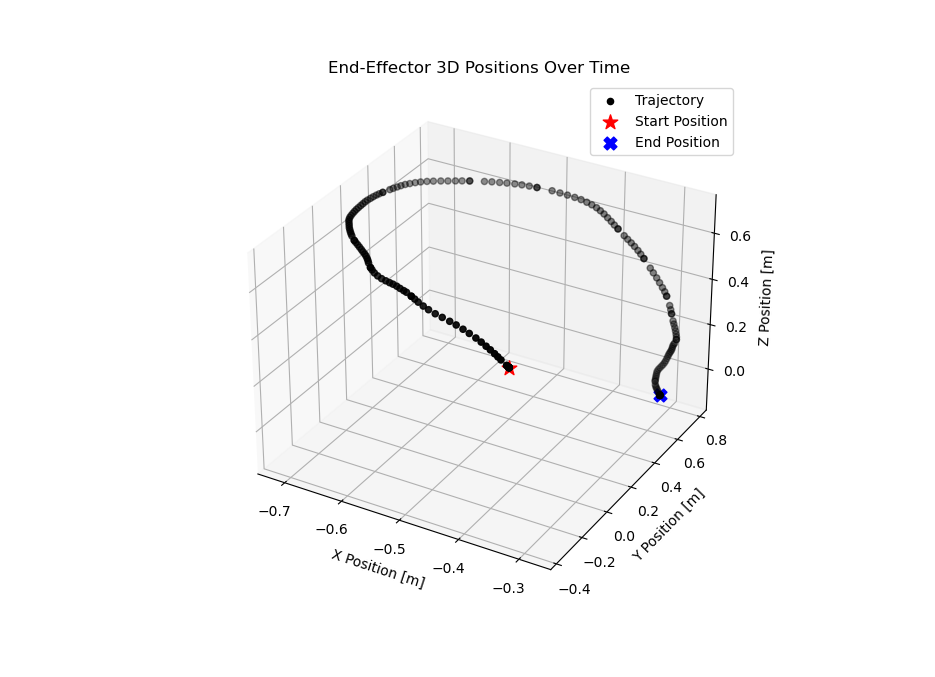

In [74]:
# enable interactive plots in Jupyter Notebook
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111,
                     projection="3d")

plot_trajectory(ax=ax,
                trajectory=data,
                color="black",
                traj_s=20,
                start_s=120,
                end_s=85,
                label="Trajectory")

ax.set_xlabel("X Position [m]")
ax.set_ylabel("Y Position [m]")
ax.set_zlabel("Z Position [m]")
ax.set_title("End-Effector 3D Positions Over Time")

ax.legend()

plt.show()

## Run Through All Files

In [75]:
data_list = []

for file in json_files:

    json_path = os.path.join(dataset_folder + "\\jsons", file)
    
    data = read_json(json_path)
    data_list.append(data)

<IPython.core.display.Javascript object>


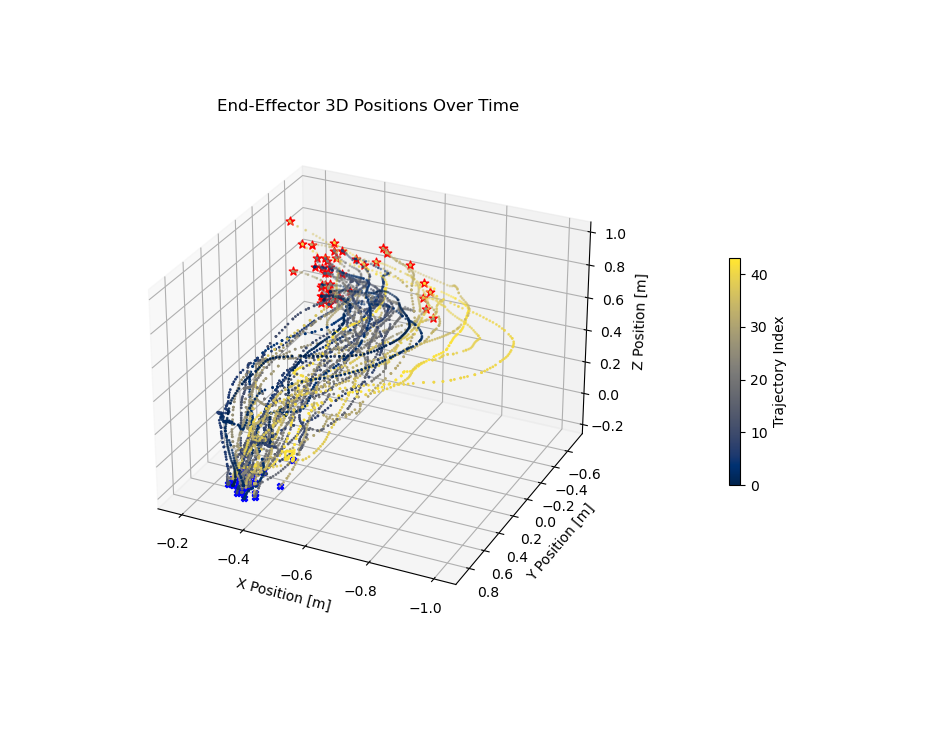

C:\Users\24989903\AppData\Local\Temp\ipykernel_9868\1563294102.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter_traj = ax.scatter(x, y, z,


In [76]:
visualize_trajectories(data_list)